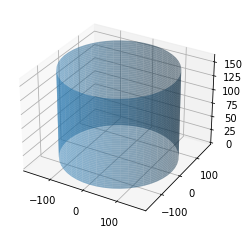

In [10]:
import numpy as np

def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(0, height_z, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xc,Yc,Zc = data_for_cylinder_along_z(0,0,160,160)
ax.plot_surface(Xc, Yc, Zc, alpha=0.5)

plt.show()

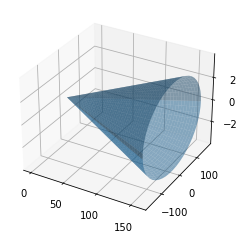

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(0, height_z, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

def data_for_cone_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(0, height_z, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = z_grid*np.cos(theta_grid) + center_x
    y_grid = z_grid*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

def data_for_cone_along_y(center_x,center_y,radius,height_z,rotate):
    z = np.linspace(0, height_z, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = z_grid*np.cos(theta_grid)*np.cos(rotate) + center_x
    y_grid = z_grid*np.sin(theta_grid)*np.sin(rotate) + center_y
    return z_grid,x_grid,y_grid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xc,Yc,Zc = data_for_cone_along_y(0,0,0,160,2*np.pi)
ax.plot_surface(Xc, Yc, Zc, alpha=0.5)

#Xc1,Yc1,Zc1 = data_for_cylinder_along_z(0,0,160,160)
#ax.plot_surface(Xc1, Yc1, Zc1, alpha=0)

plt.show()

C:\Users\JH_LAB\AppData\Local\Temp/ipykernel_7548/61285804.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


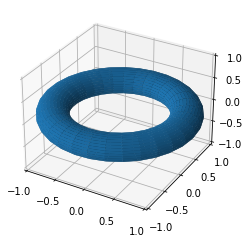

In [55]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Generate torus mesh
angle = np.linspace(0, 2 * np.pi, 32)
theta, phi = np.meshgrid(angle, angle)
r, R = .25, 1.
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

# Display the mesh
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(X, Y, Z)
plt.show()

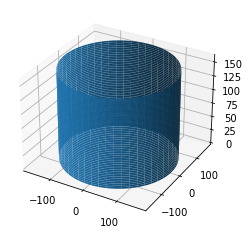

In [68]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Generate torus mesh
def cylinder(radius,height,number_cell):
    # make meshgrid
    angle = np.linspace(0, 2 * np.pi, 1000)
    h = np.linspace(0, height, 1000)
    u, v = np.meshgrid(angle, h)
    
    # parametic surface
    X = radius * np.cos(u)
    Y = radius * np.sin(u)
    Z = v
    return X,Y,Z

# Display the mesh
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xcyl,Ycyl,Zcyl = cylinder(160,160,100)
ax.plot_surface(Xcyl,Ycyl,Zcyl)
plt.show()

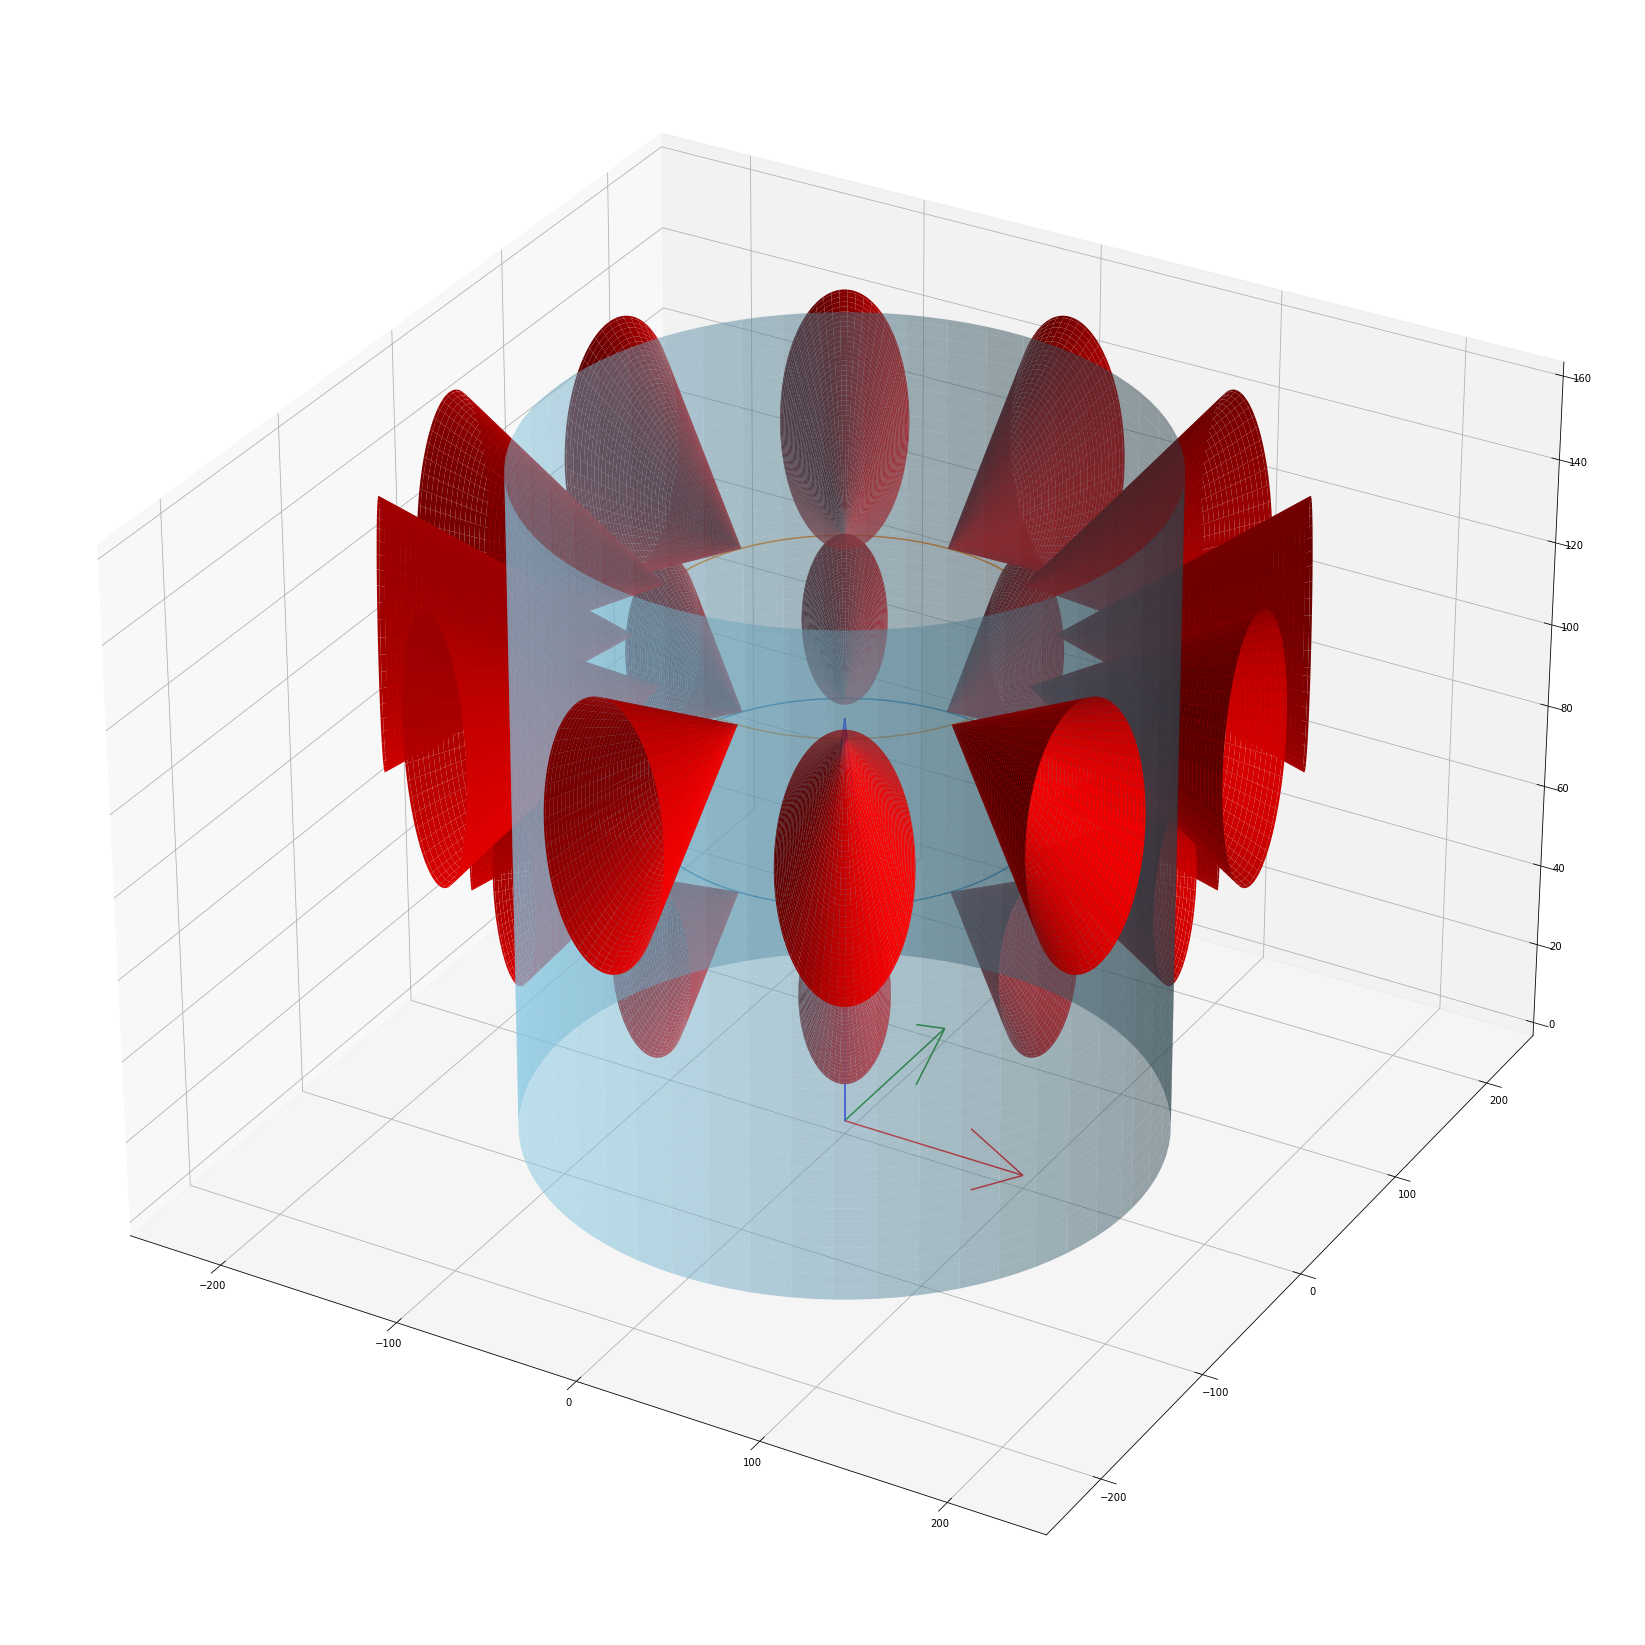

In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def cylinder(radius,height,number_cell):
    # make meshgrid
    angle = np.linspace(0, 2 * np.pi, number_cell)
    h = np.linspace(0, height, number_cell)
    u, v = np.meshgrid(angle, h)
    
    # parametic surface
    X = radius * np.cos(u)
    Y = radius * np.sin(u)
    Z = v
    return X,Y,Z

def cone(radius,height,number_cell):
    # make meshgrid
    angle = np.linspace(0, 2 * np.pi, number_cell)
    h = np.linspace(0, height, number_cell)
    u, v = np.meshgrid(angle, h)
    
    alpha = 30
    alpha_rad = alpha / 180 * np.pi
    
    # parametic surface
    X = v * np.cos(u) * np.tan(alpha_rad/2) 
    Y = v + radius
    Z = v * np.sin(u) * np.tan(alpha_rad/2) + height
    return X,Y,Z

def rotote_cone(radius,height,number_cell,rotate_along_z):
    # make meshgrid
    angle = np.linspace(0, 2 * np.pi, number_cell)
    h = np.linspace(0, height, number_cell)
    u, v = np.meshgrid(angle, h)
    
    alpha = 30
    alpha_rad = alpha / 180 * np.pi
    
    rotate_rad = rotate_along_z  / 180 * np.pi
    
    # parametic surface

    X = v * np.cos(u) * np.tan(alpha_rad/2) 
    Y = v + radius
    Z = v * np.sin(u) * np.tan(alpha_rad/2) + height
    
    Xr = X * np.cos(rotate_rad) + Y  * np.sin(rotate_rad)
    Yr = -X * np.sin(rotate_rad) + Y  * np.cos(rotate_rad)  
    Zr = Z
    
    return Xr,Yr,Zr

def arrow(size):
    ax.quiver([0],[0],[0],[size],[0],[0], colors='r')
    ax.quiver([0],[0],[0],[0],[size],[0], colors='g')
    ax.quiver([0],[0],[0],[0],[0],[size], colors='b')
    
def circle(radius, height):
    
    angle = np.linspace(0, 2 * np.pi, 100)
    
    x = radius * np.cos(angle)
    y = radius* np.sin(angle)
    z = height
    
    return x,y,z

# Display the mesh
fig = plt.figure(figsize=(30, 30))

ax = fig.add_subplot(111, projection='3d')

arrow(100)

Xcyl,Ycyl,Zcyl = cylinder(160,160,100)
ax.plot_surface(Xcyl,Ycyl,Zcyl,alpha=0.5, color='skyblue')

#Xco,Yco,Zco = cone(100,80,1000)
#ax.plot_surface(Xco,Yco,Zco)

for i in range(0,360,30):
    Xcr,Ycr,Zcr = rotote_cone(100,80,100,i)
    ax.plot_surface(Xcr,Ycr,Zcr,color = 'r')

Xcyl,Ycyl,Zcyl = circle(100,80)
ax.plot(Xcyl,Ycyl,Zcyl)    

for i in range(0,360,30):
    Xcr,Ycr,Zcr = rotote_cone(100,120,100,i)
    ax.plot_surface(Xcr,Ycr,Zcr,color = 'r')
    
Xcyl,Ycyl,Zcyl = circle(100,120)
ax.plot(Xcyl,Ycyl,Zcyl)

plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0,np.pi * 2, 100)
R = 160
a = 80
r = 100
alpha = 30
alpha_rad = alpha / 180 * np.pi
tan_al = np.tan(alpha_rad)

z = a + np.sqrt((tan_al*(R*np.sin(theta)-r))**2 - (R*np.cos(theta))**2)

C:\Users\JH_LAB\AppData\Local\Temp/ipykernel_35116/2233814371.py:12: RuntimeWarning: invalid value encountered in sqrt
  z = a + np.sqrt((tan_al*(R*np.sin(theta)-r))**2 - (R*np.cos(theta))**2)


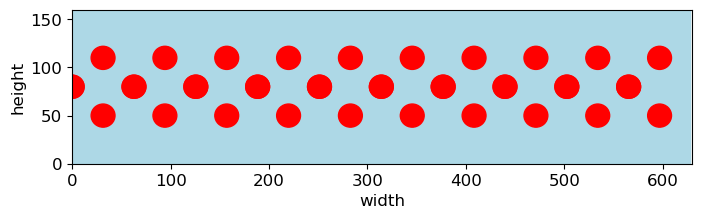

number of sensors : 20


In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8,2)
plt.rcParams['font.size'] = 12

# 2. 필요한 변수 지정

D = 200 
d = 100
R = D/2
r = d/2
L = 160
alpha = np.deg2rad(27)

nx = 10
ny = 2

# 3. 그래프 그리기
fig, ax = plt.subplots()

ax.set_xlim(0, 630)
ax.set_ylim(0, 160)
ax.set_xlabel('width')
ax.set_ylabel('height')

# 4. 사각형 그리기
ax.add_patch(
   patches.Rectangle(
      (0, 0),                   # (x, y)
      2*np.pi*R, L,                     # width, height
      edgecolor = 'lightblue',
      facecolor = 'lightblue',
      fill=True,
   ))
for j in range(0,ny):
    for i in range(0,nx):
        ax.add_patch(
       patches.Ellipse(
          (2*np.pi*R/nx*(i+1/2), 50+j*60),                   # (x, y)
          (R-r)/np.cos(alpha/2)*alpha, (R-r)*2*np.tan(alpha/2),                     # width, height
          edgecolor = 'red',
          facecolor = 'red',
          fill=True,
       ))
        ax.add_patch(
       patches.Ellipse(
          (2*np.pi*R/nx*(i), 80),                   # (x, y)
          (R-r)/np.cos(alpha/2)*alpha, (R-r)*2*np.tan(alpha/2),                     # width, height
          edgecolor = 'red',
          facecolor = 'red',
          fill=True,
       ))
       
        
# 5. 텍스트 삽입하기
plt.show()

print('number of sensors : {0}'.format(nx*ny))


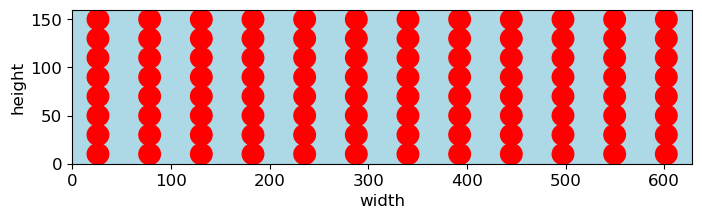

number of sensors : 96
number of sensors : 12
number of sensors : 8


In [68]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8,2)
plt.rcParams['font.size'] = 12

# 2. 필요한 변수 지정

D = 200 # 천 외경
d = 110 # 센서 위치 지름
R = D/2
r = d/2
L = 160 # 센서 길이
alpha = np.deg2rad(27) # FoV

nr = 12 # 원주방향
nz = 8 # 축방향

# 3. 그래프 그리기
fig, ax = plt.subplots()

ax.set_xlim(0, np.pi*D)
ax.set_ylim(0, L)
ax.set_xlabel('width')
ax.set_ylabel('height')

# 4. 사각형 그리기
ax.add_patch(
   patches.Rectangle(
      (0, 0),                   # (x, y)
      2*np.pi*R, L,                     # width, height
      edgecolor = 'lightblue',
      facecolor = 'lightblue',
      fill=True,
   ))
for j in range(0,nz):
    for i in range(0,nr):
        ax.add_patch(
       patches.Ellipse(
          (2*np.pi*R/nr*(i+1/2), 10+j*20),                   # (x, y)
          (R-r)/np.cos(alpha/2)*alpha, (R-r)*2*np.tan(alpha/2),                     # width, height
          edgecolor = 'red',
          facecolor = 'red',
          fill=True,
       ))        
        
# 5. 텍스트 삽입하기
plt.show()

print('number of sensors : {0}'.format(nr*nz))
print('number of sensors : {0}'.format(nr))
print('number of sensors : {0}'.format(nz))